# Robot Weightlifting

Solution to [Robot Weightlifting](https://www.janestreet.com/puzzles/robot-weightlifting-index/)

## Problem description
The Robot Weightlifting World Championship’s final round is about to begin! Three robots, seeded 1, 2, and 3, remain in contention. They take turns from the 3rd seed to the 1st seed publicly declaring exactly how much weight (any nonnegative real number) they will attempt to lift, and no robot can choose exactly the same amount as a previous robot. Once the three weights have been announced, the robots attempt their lifts, and the robot that successfully lifts the most weight is the winner. If all robots fail, they just repeat the same lift amounts until at least one succeeds.

Assume the following:

1) all the robots have the same probability p(w) of successfully lifting a given weight w;

2) p(w) is exactly known by all competitors, continuous, strictly decreasing as the w increases, p(0) = 1, and p(w) -> 0 as w -> infinity; and

3) all competitors want to maximize their chance of winning the RWWC.

If w is the amount of weight the 3rd seed should request, find p(w). Give your answer to an accuracy of six decimal places.

## Approach
Backward: start solving for best strategy for robot 3, then robot 2, then robot 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Robot 3

In [2]:
def get_choices_robot_3(p_w1, p_w2):
    p_wl = max(p_w1, p_w2)
    p_wh = min(p_w1, p_w2)

    # Dictionnary of choice: probability of 3 to win
    dict_values = {
        "0": (1-p_wl)*(1-p_wh), # 0
        "w1+" if p_w1 > p_wh else "w2+": (1-p_wh)*p_wl / (1 - (1-p_wh) * (1-p_wl)**2), # lower weight
        "w2+" if p_w1 > p_wh else "w1+": p_wh / (1 - (1-p_wh)**2 * (1-p_wl)), # higher weight
    }
    
    return dict_values

def get_optimal_choice_robot_3(p_w1, p_w2):
    return max(get_choices_robot_3(p_w1, p_w2), key=get_choices_robot_3(p_w1, p_w2).get)


def get_proba_robot_3_wins_at_optimal(p_w1, p_w2):
    return max(get_choices_robot_3(p_w1, p_w2).values())

In [5]:
get_proba_robot_3_wins_at_optimal(p_w1=0, p_w2=0.382)

0.6180469715698392

In [6]:
print(f"Choice of robot 3, for 2 choosing p_w2=0.38: w3 = {get_optimal_choice_robot_3(p_w1=0, p_w2=0.38)}")
print(f"Corresponding proba of win for roboot 3: {get_proba_robot_3_wins_at_optimal(p_w1=0, p_w2=0.38)}")

Choice of robot 3, for 2 choosing p_w2=0.38: w3 = 0
Corresponding proba of win for roboot 3: 0.62


In [7]:
print(f"Choice of robot 3, for 2 choosing p_w2=0.39: w3 = {get_optimal_choice_robot_3(p_w1=0, p_w2=0.39)}")
print(f"Corresponding proba of win for roboot 3: {get_proba_robot_3_wins_at_optimal(p_w1=0, p_w2=0.39)}")

Choice of robot 3, for 2 choosing p_w2=0.39: w3 = w2+
Corresponding proba of win for roboot 3: 0.6211180124223603


## Robot 2

In [8]:
def get_proba_robot_2_wins(p_w1, p_w2):
    w3 = get_optimal_choice_robot_3(p_w1, p_w2)
    
    if w3 == "0":
        if p_w1 > p_w2: #If w1 < w2
            return p_w2
        else:
            return p_w2*(1-p_w1)
    
    if w3 == "w2+":
        norm = 1 / (1 - (1-p_w1)*(1-p_w2)**2)
        if p_w1 > p_w2: #If w1 < w2
            return 1/norm * p_w2*(1-p_w2)
        else:
            return 1/norm * p_w2*(1-p_w2)*(1-p_w1)
    
    if w3 == "w1+":
        norm = 1 / (1 - (1-p_w1)**2 * (1-p_w2))
        if p_w1 > p_w2: #If w1 < w2
            return p_w2
        else:
            return 1/norm * p_w2*(1-p_w1)**2

In [9]:
list_p_w1 = np.arange(0, 1.01, .05)
list_p_w2 = np.arange(0, 1.01, .05)
df_proba_robot_3_wins = pd.DataFrame(index=list_p_w1, columns=list_p_w2)
df_proba_robot_2_wins = pd.DataFrame(index=list_p_w1, columns=list_p_w2)
df_proba_robot_1_wins = pd.DataFrame(index=list_p_w1, columns=list_p_w2)

for i, p_w1 in enumerate(list_p_w1):
    for j, p_w2 in enumerate(list_p_w2):
        df_proba_robot_3_wins.iloc[i, j] = get_proba_robot_2_wins(p_w1, p_w2)
        df_proba_robot_2_wins.iloc[i, j] = get_proba_robot_3_wins_at_optimal(p_w1, p_w2)
        df_proba_robot_1_wins.iloc[i, j] = 1 - df_proba_robot_3_wins.iloc[i, j] - df_proba_robot_2_wins.iloc[i, j]

/var/folders/2j/4p6d36k160v2dh6kk726g81h0000gq/T/ipykernel_67791/2230542570.py:8: RuntimeWarning: invalid value encountered in scalar divide
  "w1+" if p_w1 > p_wh else "w2+": (1-p_wh)*p_wl / (1 - (1-p_wh) * (1-p_wl)**2), # lower weight
/var/folders/2j/4p6d36k160v2dh6kk726g81h0000gq/T/ipykernel_67791/2230542570.py:9: RuntimeWarning: invalid value encountered in scalar divide
  "w2+" if p_w1 > p_wh else "w1+": p_wh / (1 - (1-p_wh)**2 * (1-p_wl)), # higher weight


In [10]:
df_proba_robot_1_wins.astype("float").round(2)

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.18,...,0.11,0.08,0.06,0.04,0.02,0.01,0.01,0.00,0.00,0.00
0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.27,0.23,...,0.16,0.13,0.11,0.09,0.07,0.06,0.06,0.05,0.05,0.05
0.10,0.10,0.09,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.28,...,0.21,0.18,0.16,0.14,0.13,0.11,0.11,0.10,0.10,0.10
0.15,0.15,0.14,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.33,...,0.26,0.23,0.21,0.19,0.18,0.16,0.16,0.15,0.15,0.15
0.20,0.20,0.19,0.18,0.17,0.20,0.20,0.20,0.20,0.20,0.37,...,0.31,0.28,0.26,0.24,0.23,0.21,0.21,0.20,0.20,0.20
0.25,0.25,0.24,0.22,0.21,0.20,0.25,0.25,0.25,0.25,0.42,...,0.36,0.33,0.31,0.29,0.28,0.27,0.26,0.25,0.25,0.25
0.30,0.30,0.29,0.27,0.26,0.24,0.23,0.30,0.30,0.44,0.43,...,0.40,0.38,0.36,0.34,0.33,0.32,0.31,0.30,0.30,0.30
0.35,0.35,0.33,0.32,0.30,0.28,0.26,0.25,0.41,0.40,0.40,...,0.38,0.42,0.40,0.39,0.37,0.36,0.36,0.35,0.35,0.35
0.40,0.38,0.37,0.36,0.34,0.32,0.30,0.43,0.36,0.38,0.37,...,0.36,0.35,0.34,0.33,0.42,0.41,0.41,0.40,0.40,0.40
0.45,0.35,0.35,0.34,0.34,0.33,0.31,0.44,0.37,0.31,0.35,...,0.34,0.33,0.32,0.31,0.30,0.29,0.46,0.45,0.45,0.45


/var/folders/2j/4p6d36k160v2dh6kk726g81h0000gq/T/ipykernel_67791/2230542570.py:8: RuntimeWarning: invalid value encountered in scalar divide
  "w1+" if p_w1 > p_wh else "w2+": (1-p_wh)*p_wl / (1 - (1-p_wh) * (1-p_wl)**2), # lower weight
/var/folders/2j/4p6d36k160v2dh6kk726g81h0000gq/T/ipykernel_67791/2230542570.py:9: RuntimeWarning: invalid value encountered in scalar divide
  "w2+" if p_w1 > p_wh else "w1+": p_wh / (1 - (1-p_wh)**2 * (1-p_wl)), # higher weight


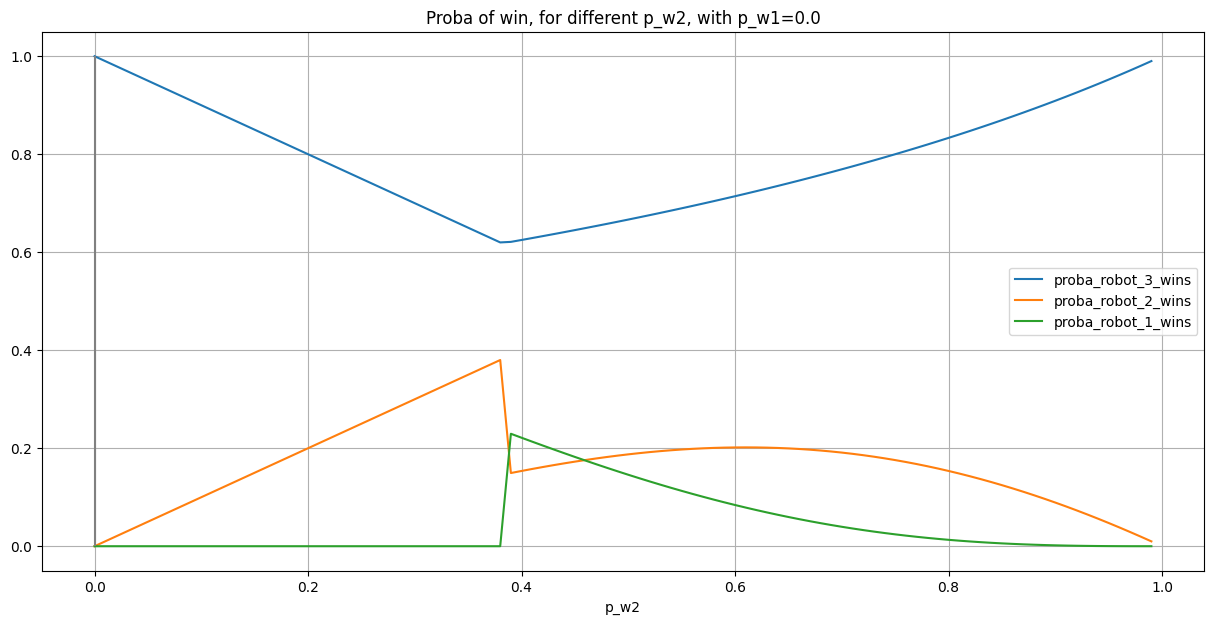

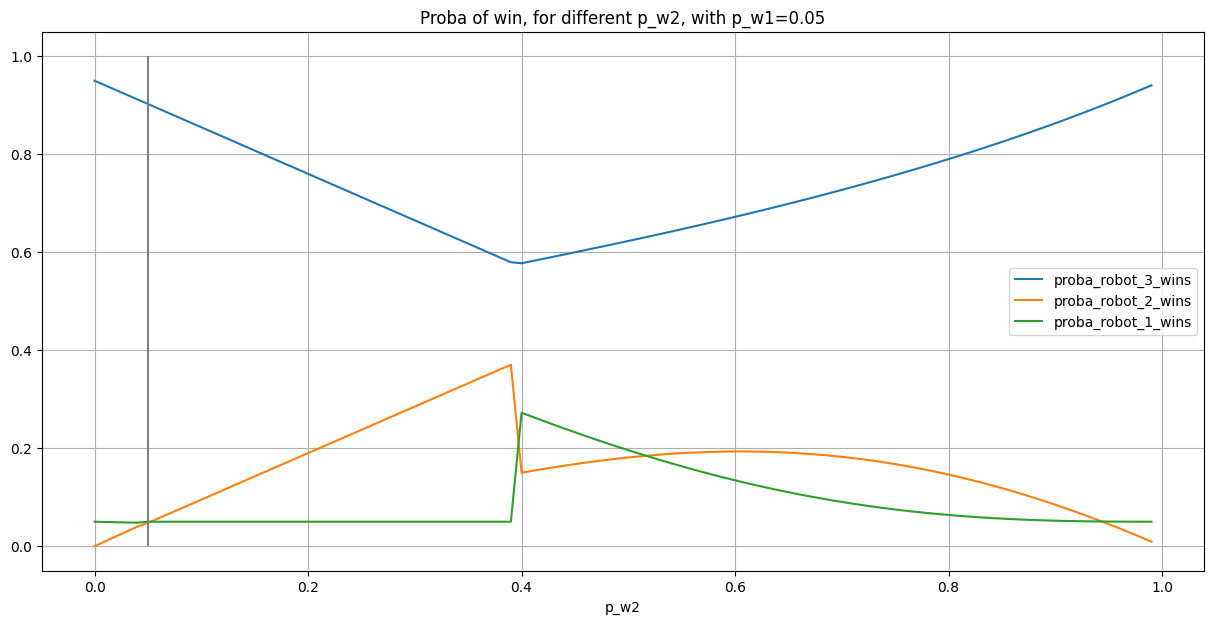

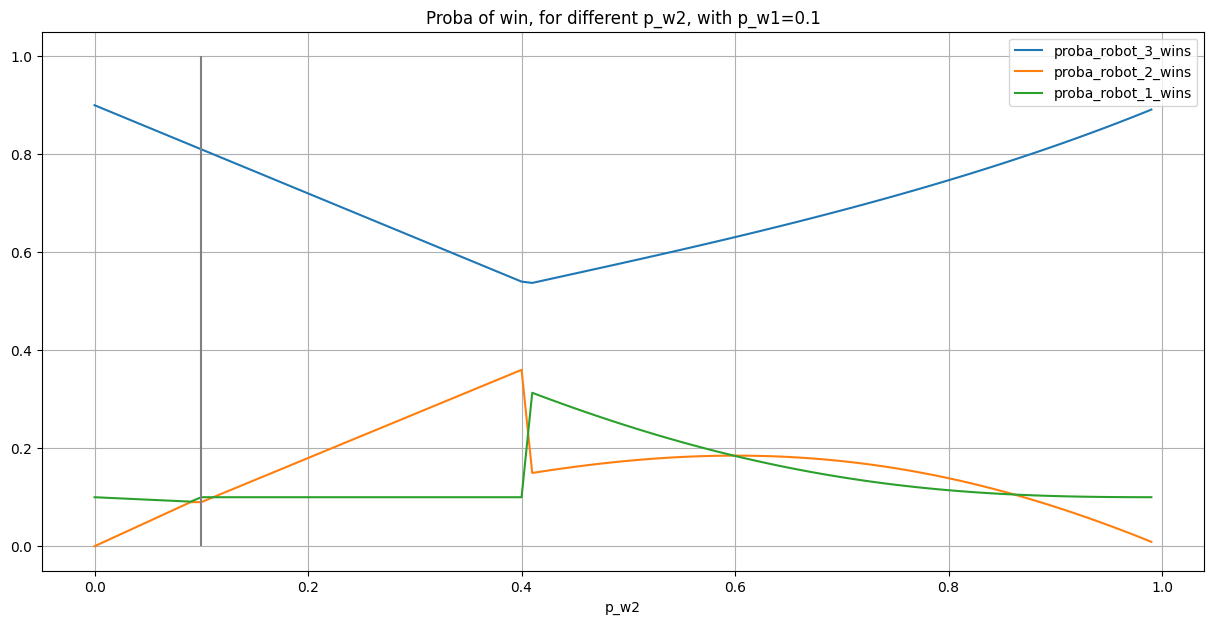

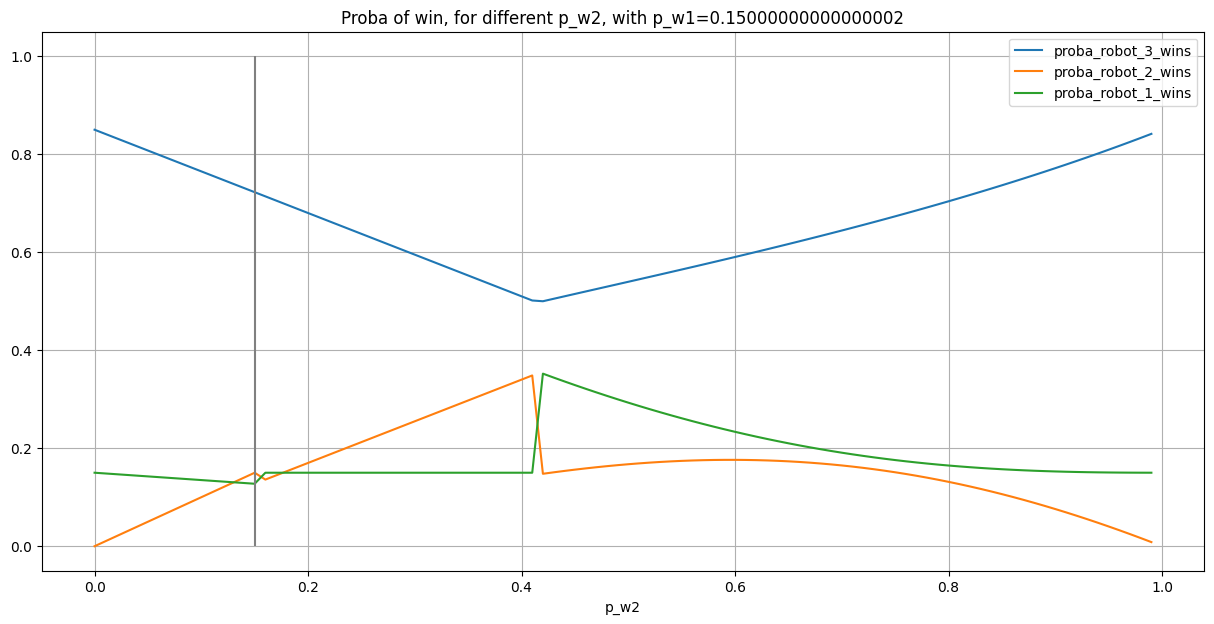

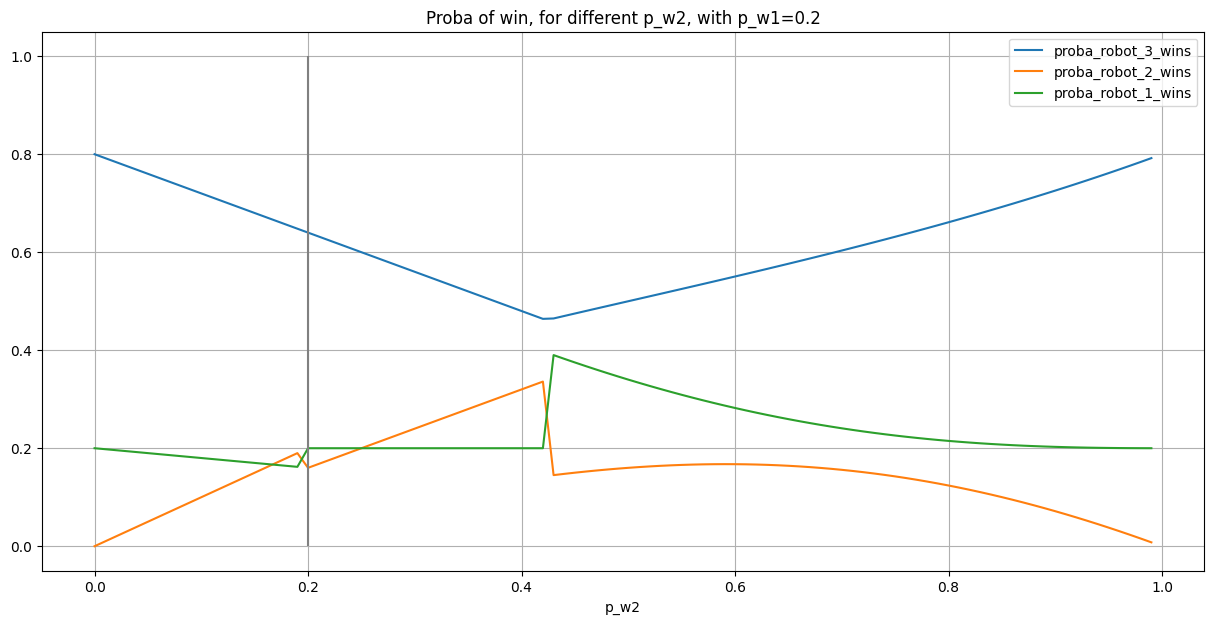

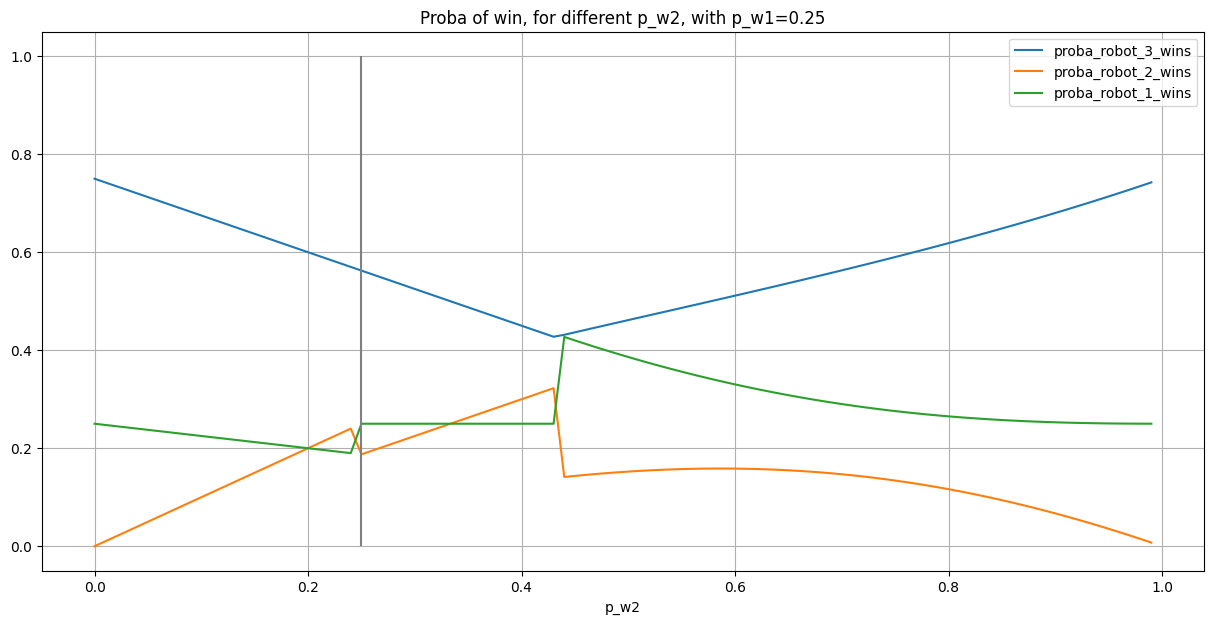

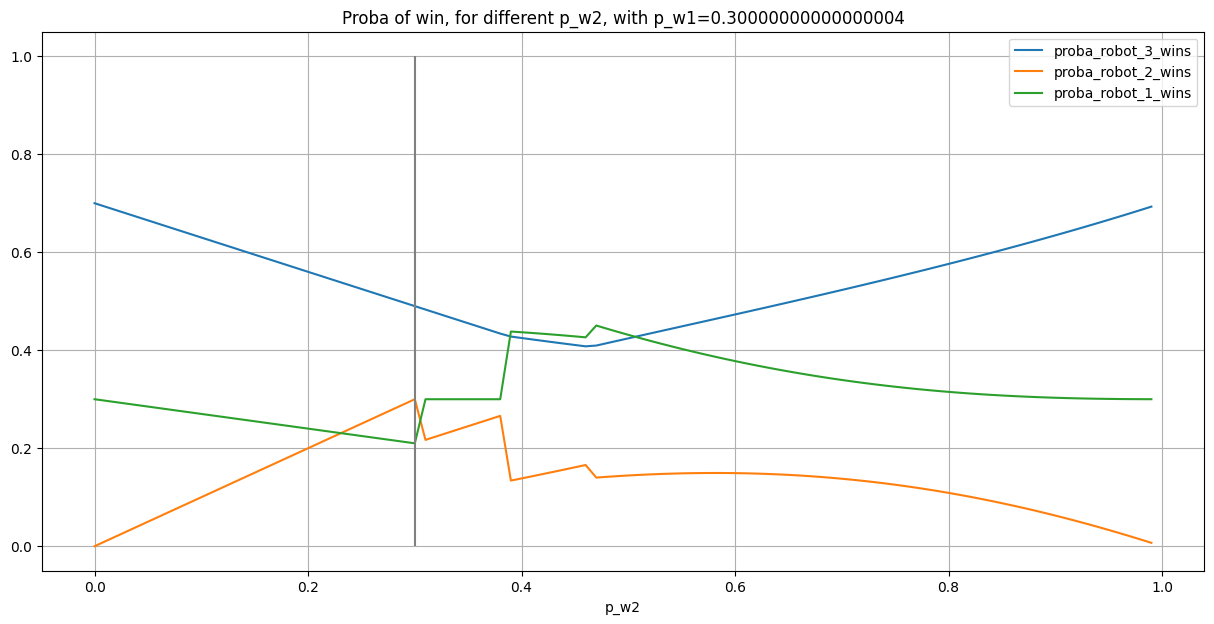

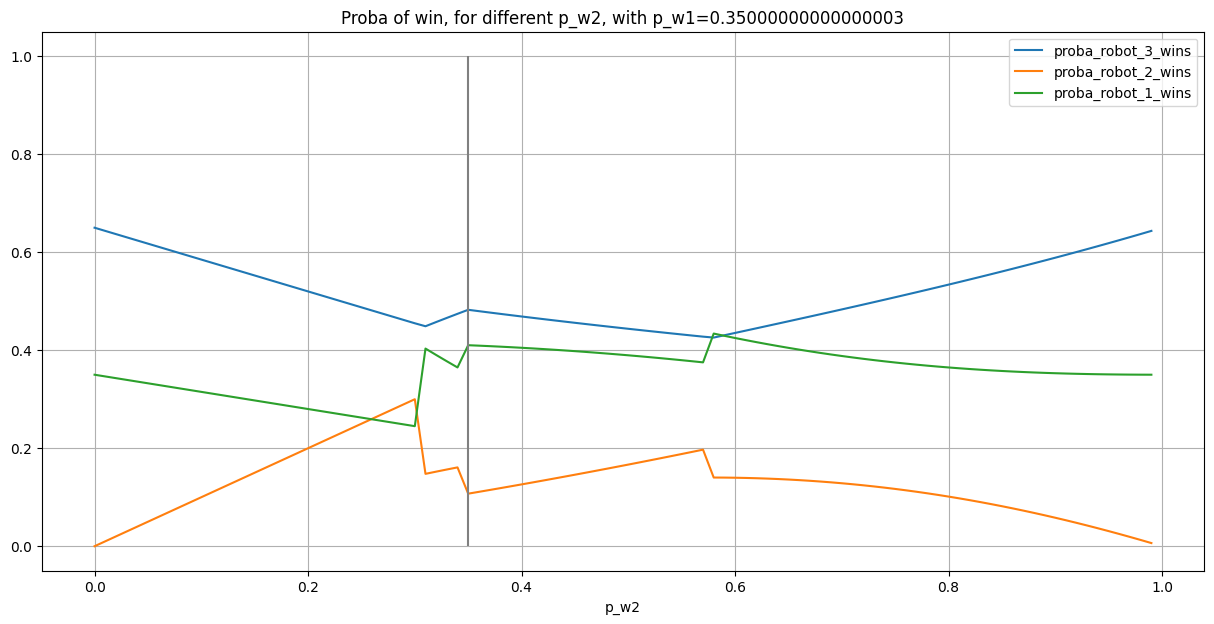

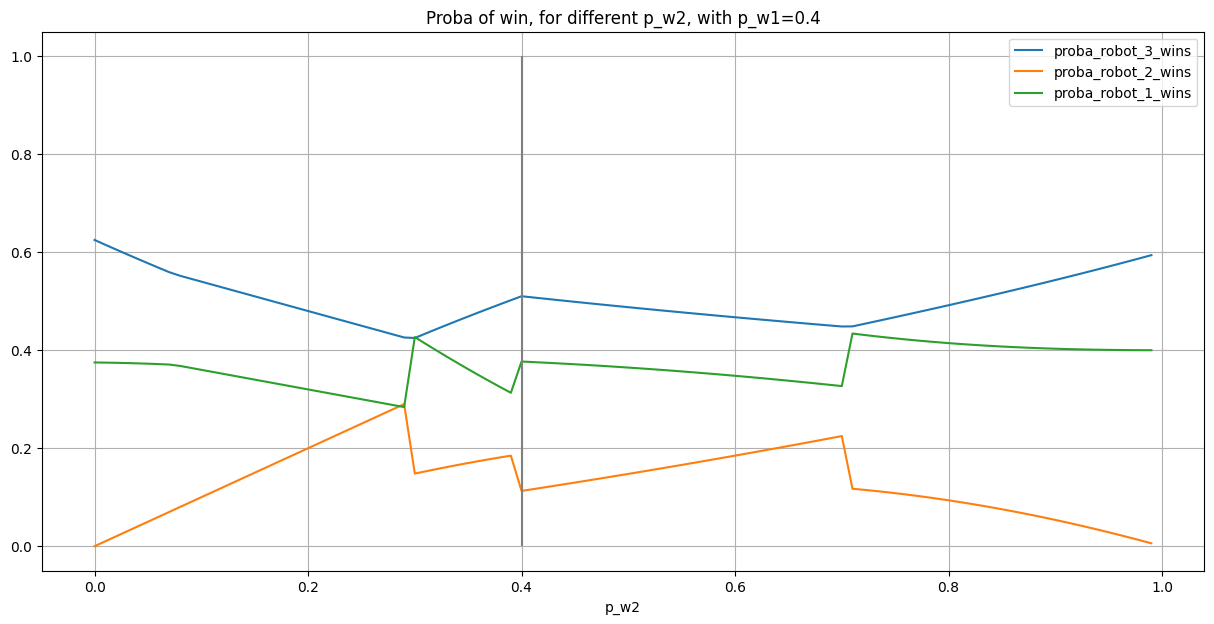

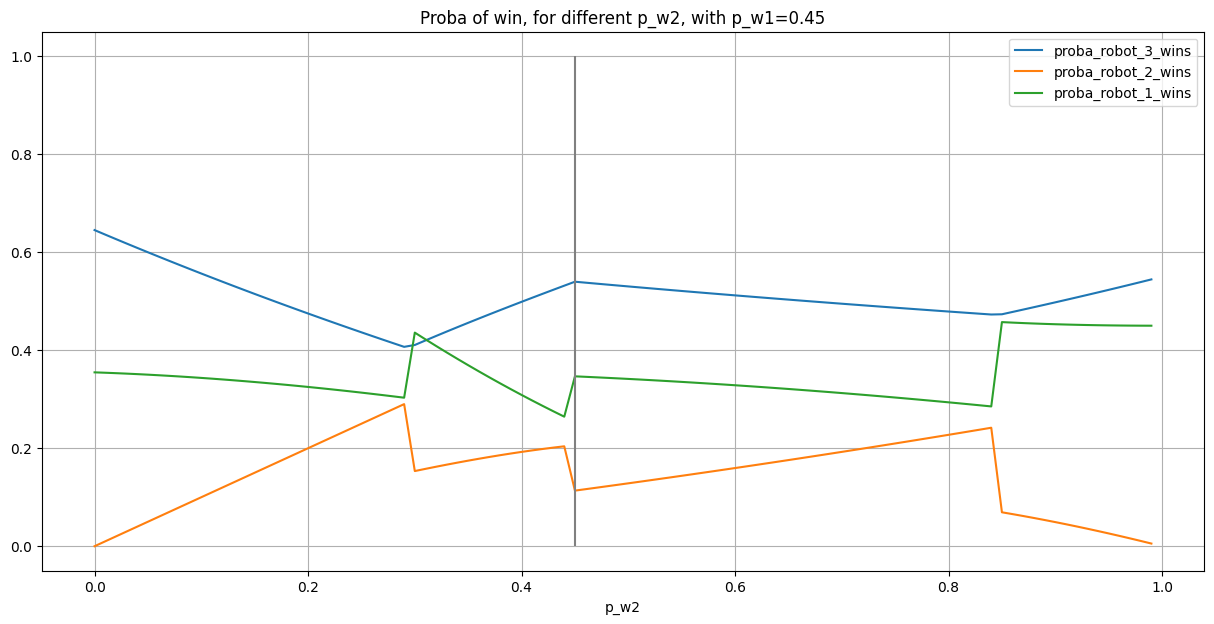

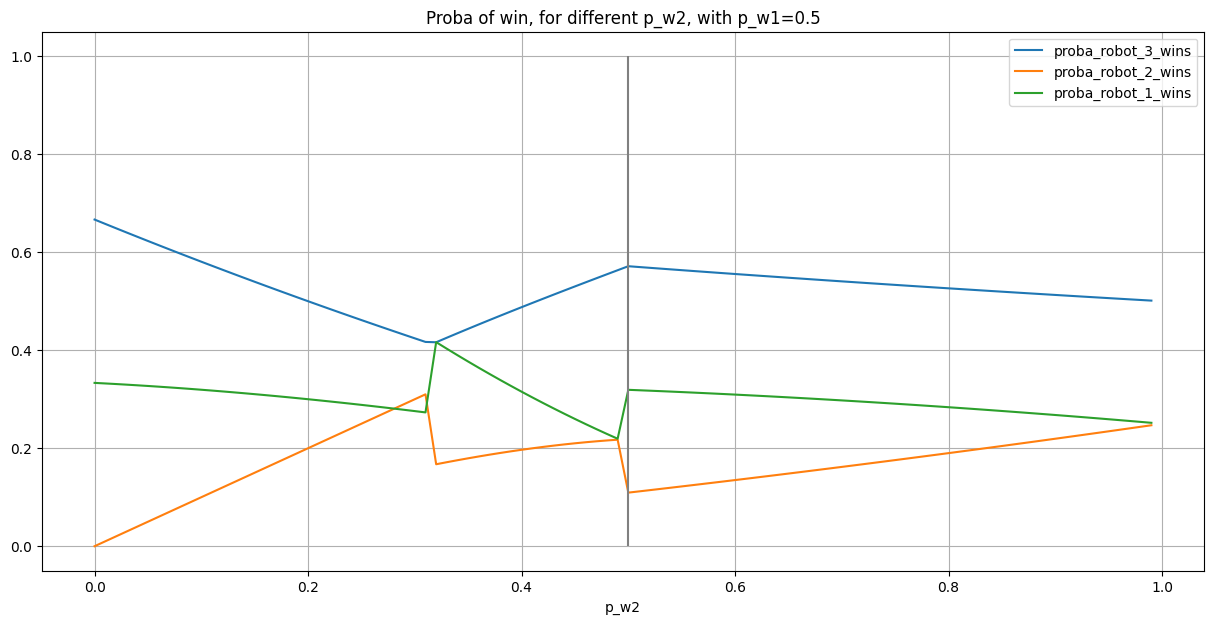

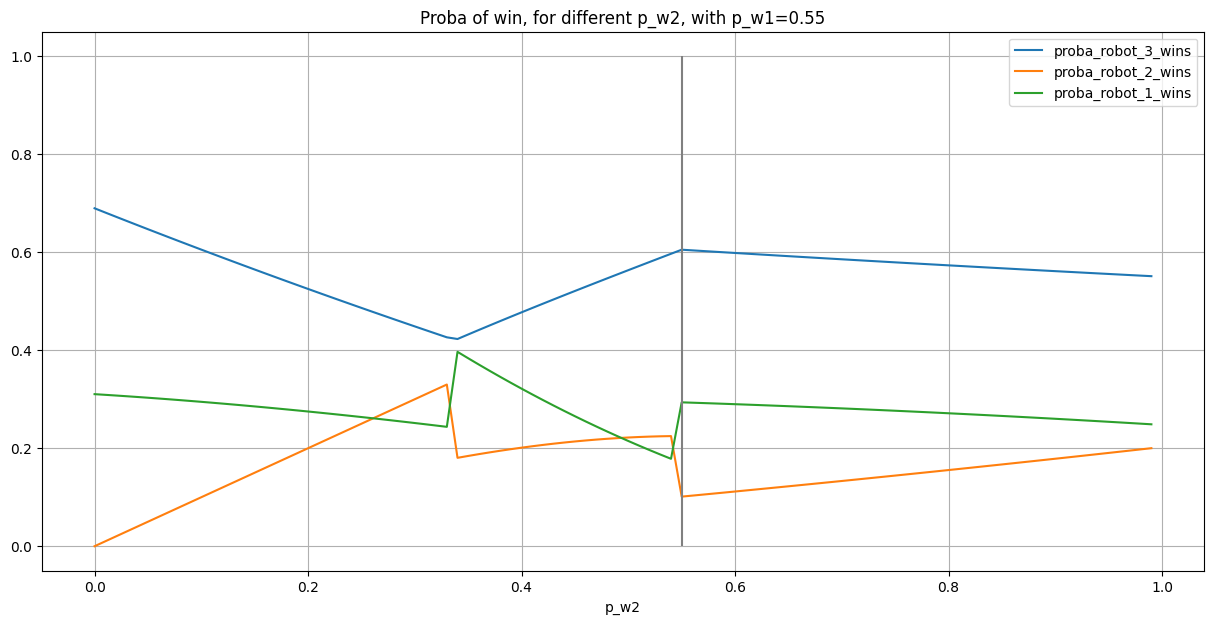

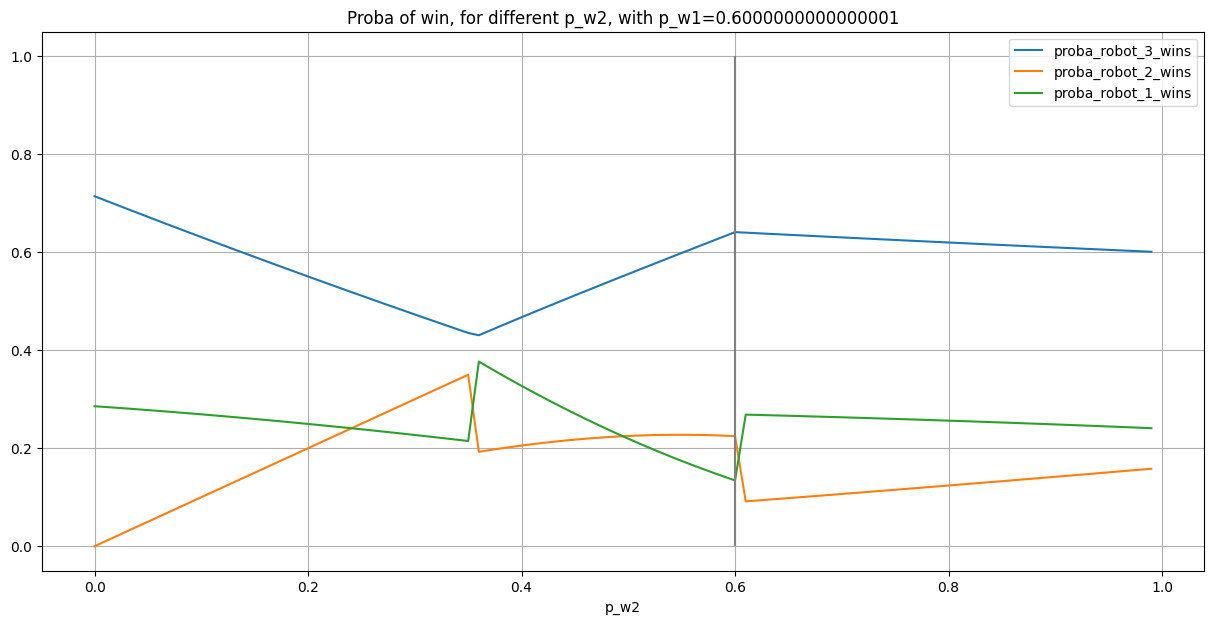

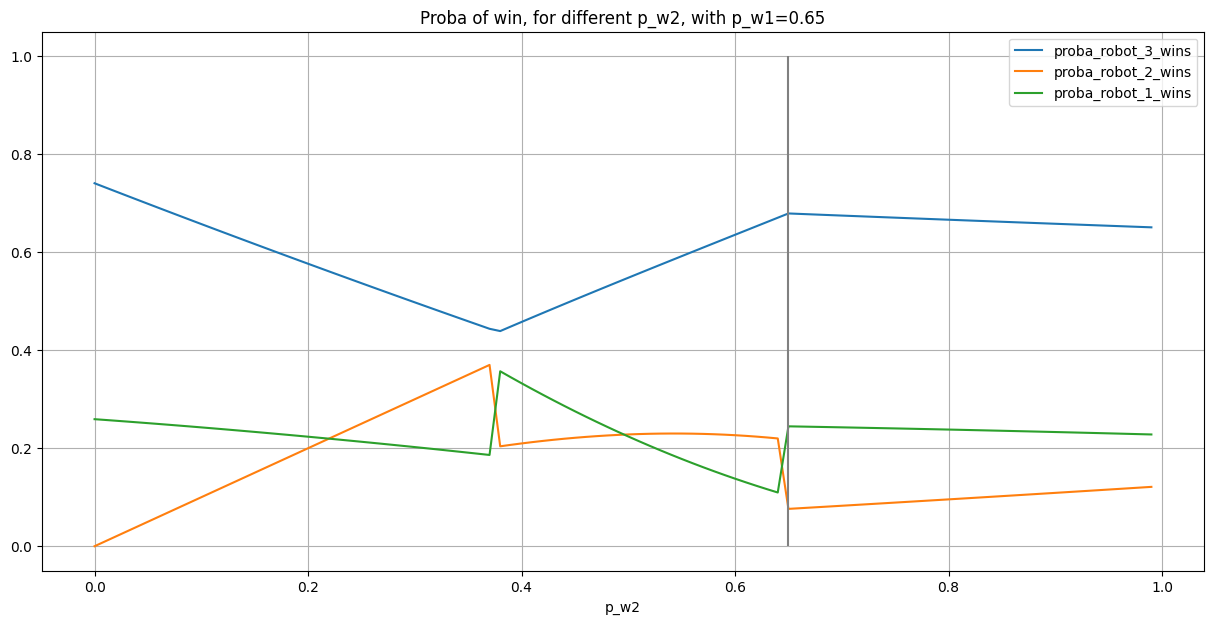

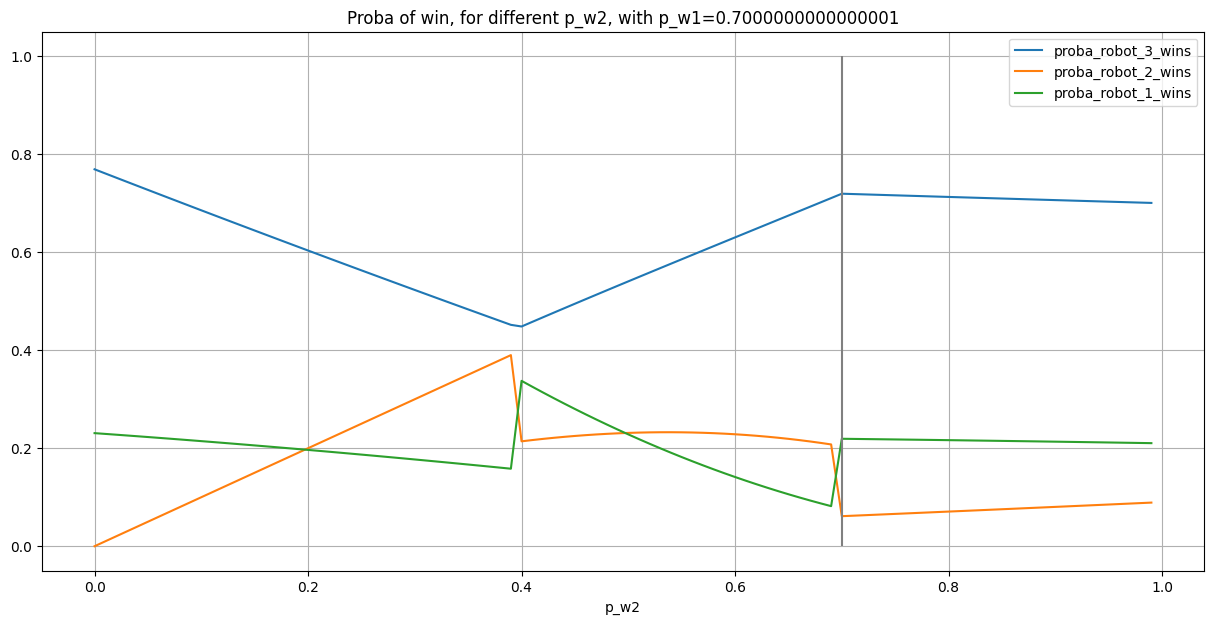

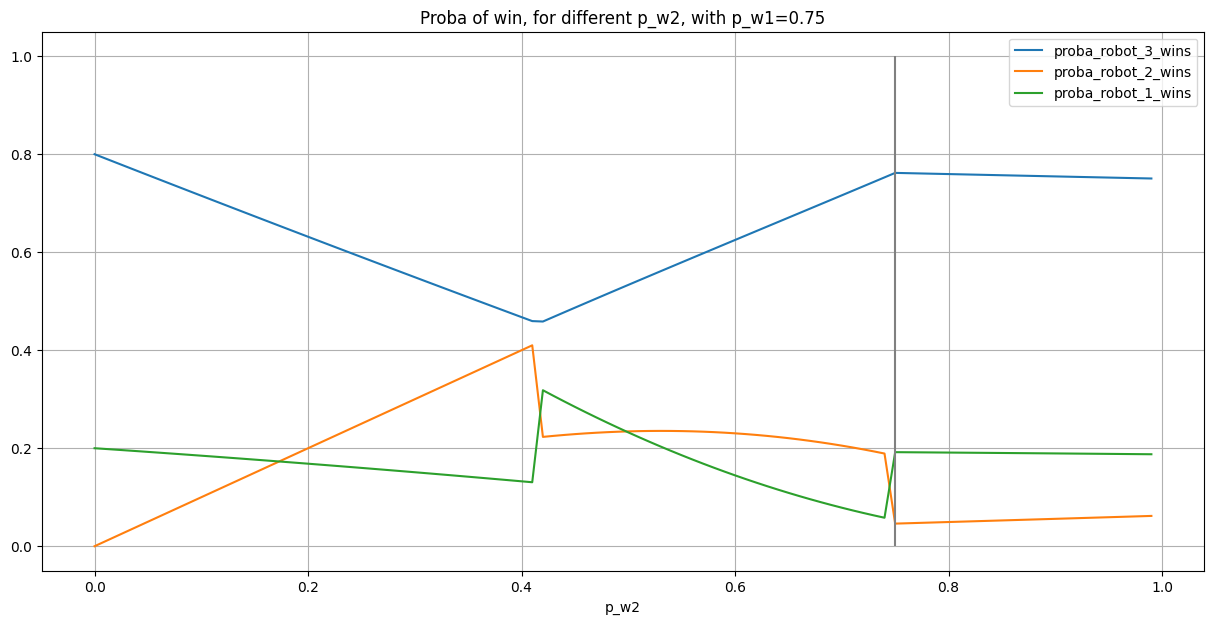

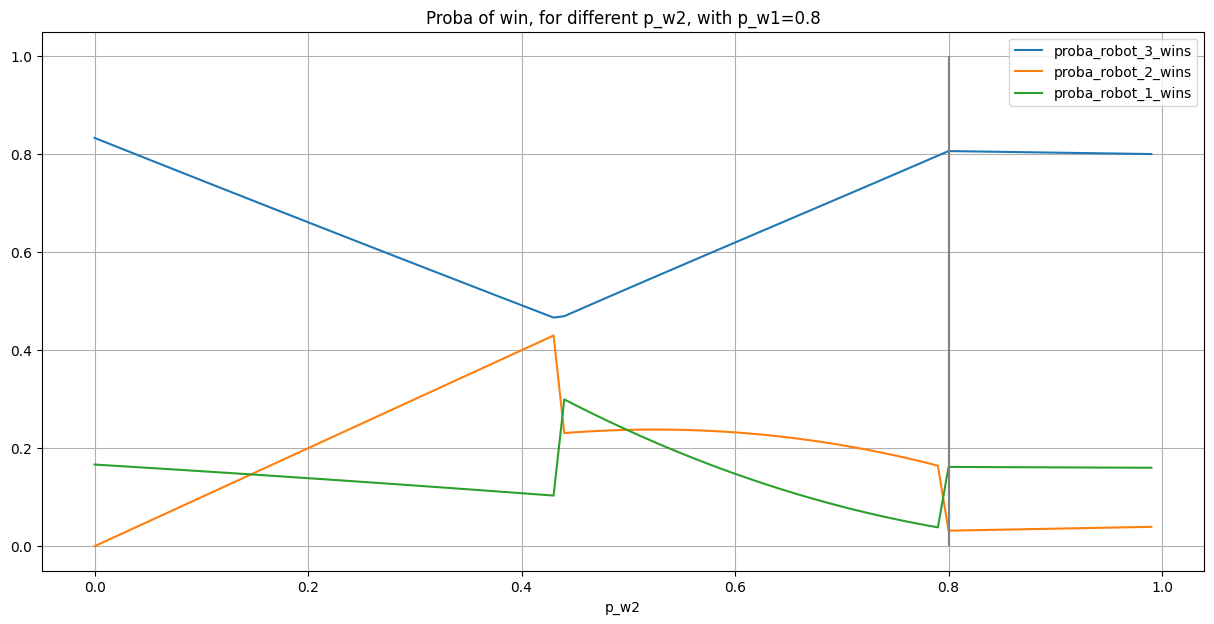

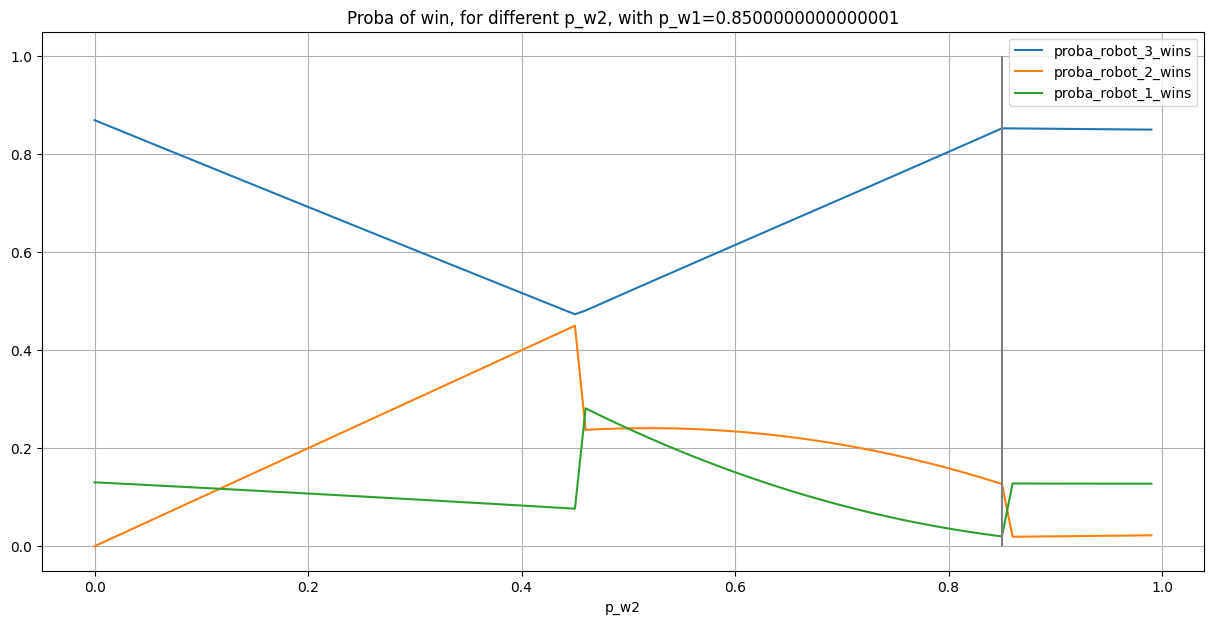

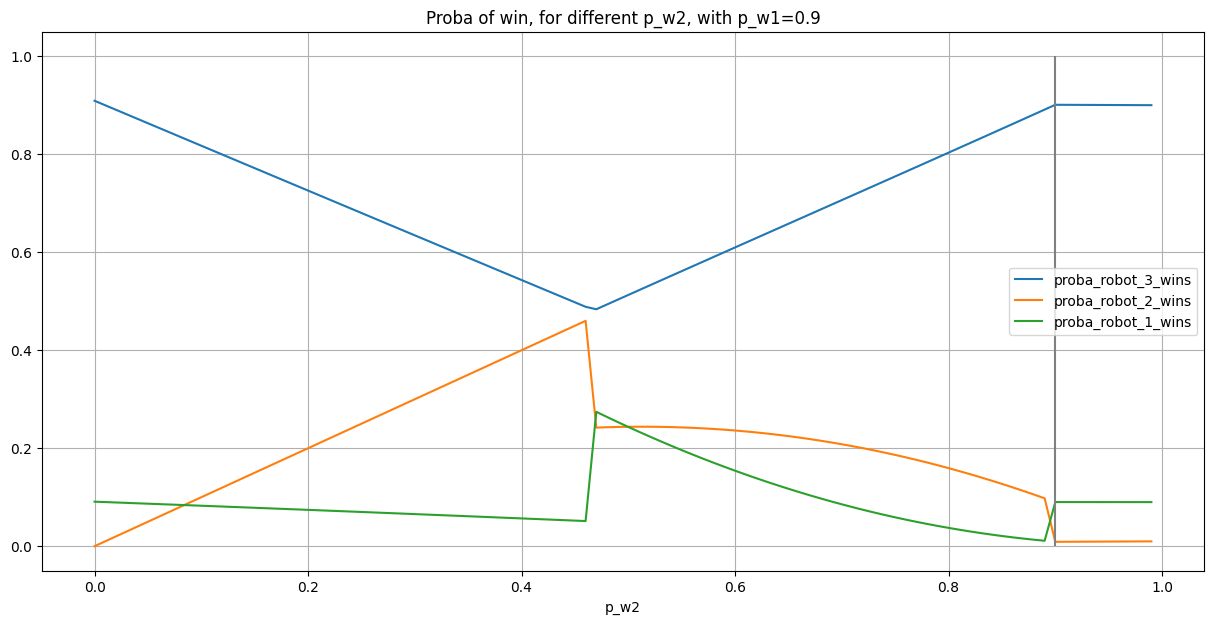

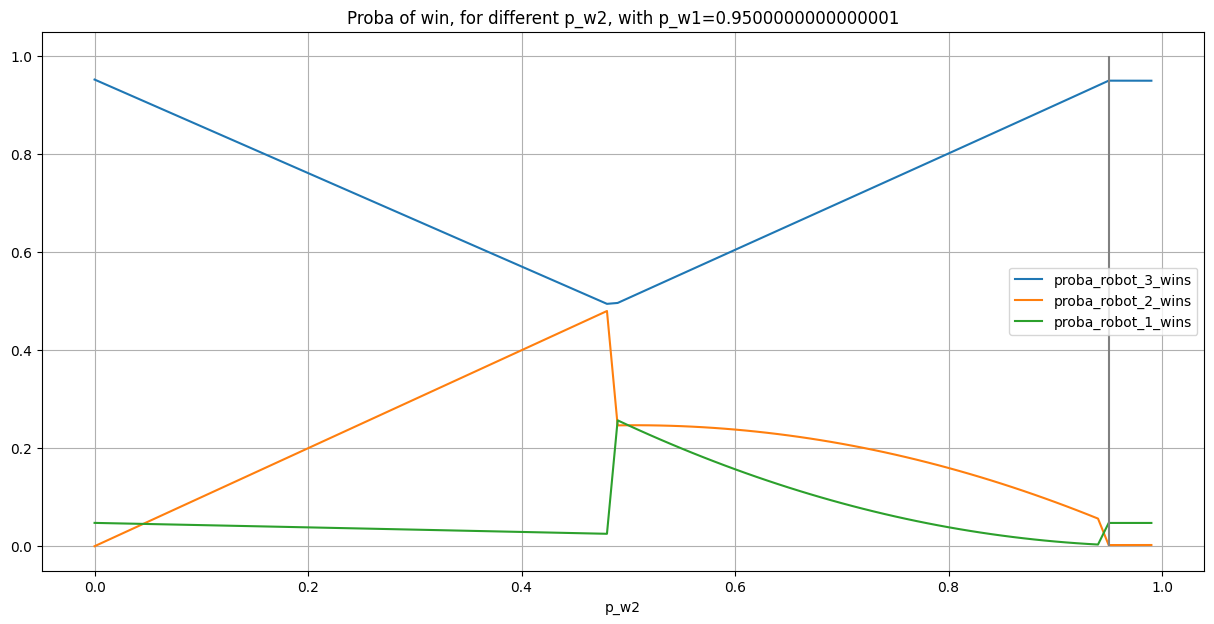

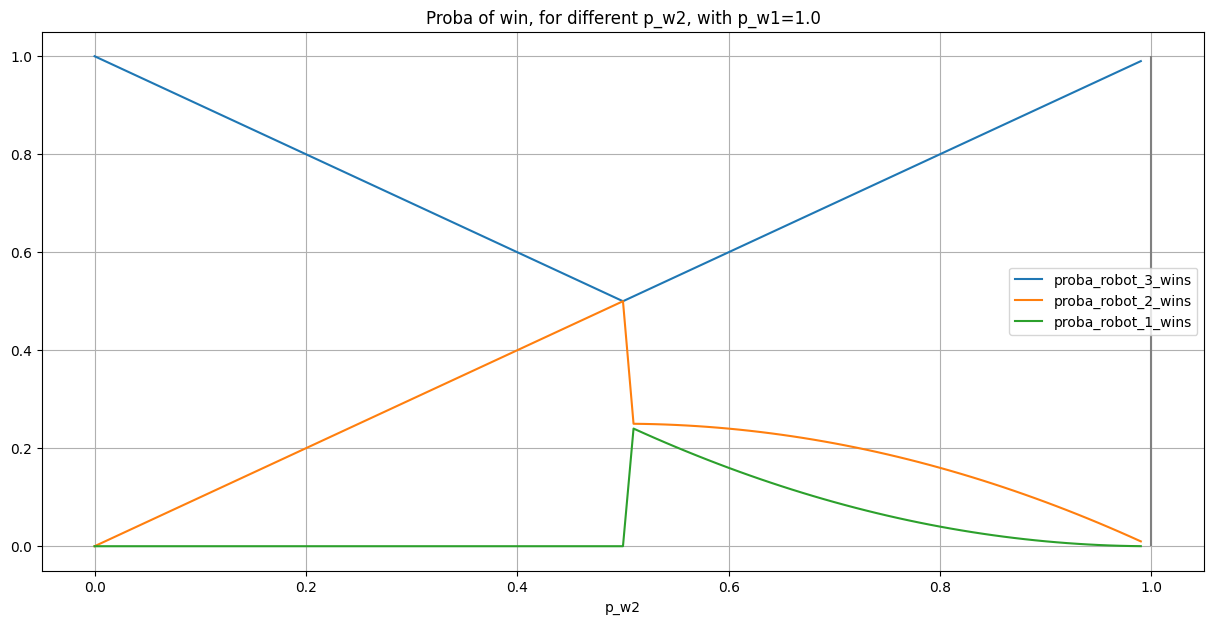

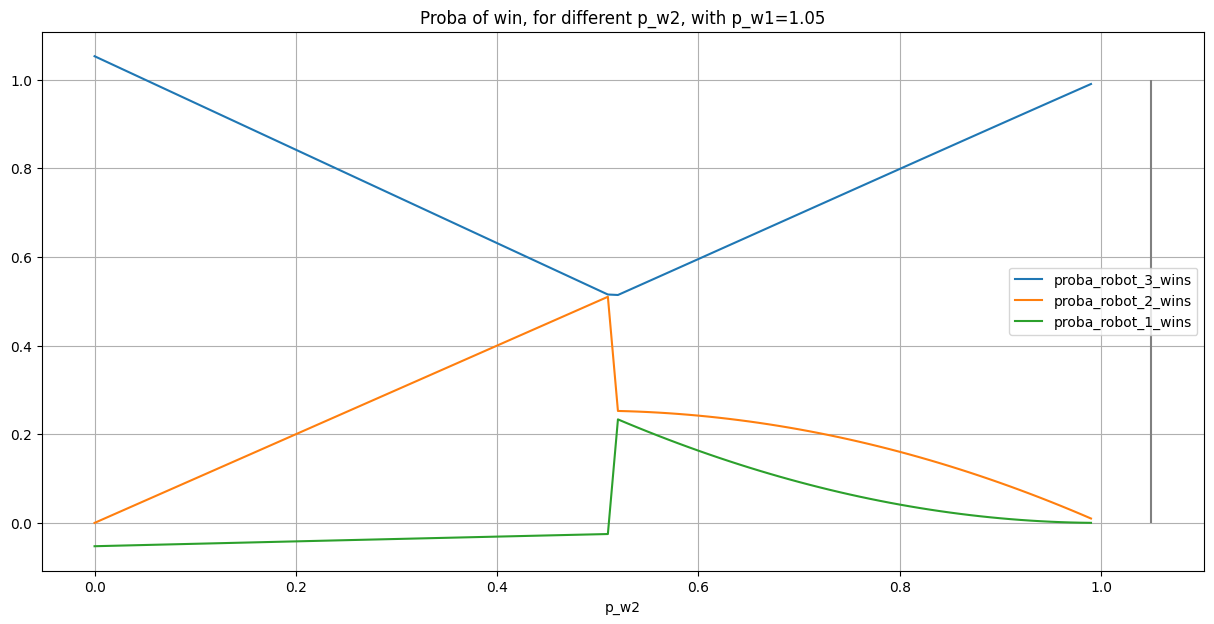

In [11]:
for p_w1 in np.arange(0, 1.1, .05):
    plt.figure(figsize=(15, 7))
    plt.plot(
        np.arange(0, 1, 0.01),
        [get_proba_robot_3_wins_at_optimal(p_w1=p_w1, p_w2=p_w2) for p_w2 in np.arange(0, 1, 0.01)],
        label="proba_robot_3_wins"
    )
    plt.plot(
        np.arange(0, 1, 0.01),
        [get_proba_robot_2_wins(p_w1=p_w1, p_w2=p_w2) for p_w2 in np.arange(0, 1, 0.01)],
        label="proba_robot_2_wins"
    )
    plt.plot(
        np.arange(0, 1, 0.01),
        [1 - get_proba_robot_3_wins_at_optimal(p_w1=p_w1, p_w2=p_w2) - get_proba_robot_2_wins(p_w1=p_w1, p_w2=p_w2) for p_w2 in np.arange(0, 1, 0.01)],
        label="proba_robot_1_wins"
    )
    plt.vlines(x=p_w1, ymin=0, ymax=1, color="grey")
    plt.title(f"Proba of win, for different p_w2, with p_w1={p_w1}")
    plt.xlabel("p_w2")
    plt.legend()
    plt.grid()
    plt.show()